In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import math
from matplotlib import pyplot as plt, rcParams, style
import seaborn as sns
sns.set(style="darkgrid")
import operator

import gc
gc.enable()
from warnings import filterwarnings, simplefilter
filterwarnings('ignore')
simplefilter('ignore')

**READING DATA INPUT**

In [2]:
path = '/kaggle/input/food-retails/'
os.listdir(path)

['dh_product_lookup.csv',
 'dh_causal_lookup.csv',
 'dh_transactions.csv',
 'dh_store_lookup.csv']

**dh_casual_lookup.csv has a problem occured in filenotfound error**

In [3]:
data_product = pd.read_csv(path+'dh_product_lookup.csv')
#data_casual = pd.read_csv(path+'dh_casual_lookup.csv')
data_store =  pd.read_csv(path+'dh_store_lookup.csv')
data_transaction = pd.read_csv(path+'dh_transactions.csv')

In [4]:
print(f'Number of data_product samples: {data_product.shape}')
print(f'Number of data_store samples: {data_store.shape}')
print(f'Number of data_transaction samples: {data_transaction.shape}')

Number of data_product samples: (927, 5)
Number of data_store samples: (387, 2)
Number of data_transaction samples: (5197681, 11)


**DATA ANALYZATION**

In [5]:
print(data_product.info())
print(data_product.columns)
print(data_product.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   upc                  927 non-null    int64 
 1   product_description  927 non-null    object
 2   commodity            927 non-null    object
 3   brand                927 non-null    object
 4   product_size         927 non-null    object
dtypes: int64(1), object(4)
memory usage: 36.3+ KB
None
Index(['upc', 'product_description', 'commodity', 'brand', 'product_size'], dtype='object')
         upc        product_description    commodity          brand  \
0  111112360  VINCENT S ORIG MARINARA S  pasta sauce      Vincent's   
1  566300023        PINE MOUNTAIN SYRUP       syrups  Pine Mountain   
2  566300028          MILLER CANE SYRUP       syrups         Miller   
3  566300029          MILLER CANE SYRUP       syrups         Miller   
4  566300035        PINE MOUNTAIN SYRUP       syru

In [6]:
print(data_store.info())
print(data_store.columns)
print(data_store.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   store           387 non-null    int64
 1   store_zip_code  387 non-null    int64
dtypes: int64(2)
memory usage: 6.2 KB
None
Index(['store', 'store_zip_code'], dtype='object')
   store  store_zip_code
0      1           37865
1      2           30084
2      3           30039
3      4           31210
4      5           30044


In [7]:
print(data_transaction.info())
print(data_transaction.columns)
print(data_transaction.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197681 entries, 0 to 5197680
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  int64  
 1   dollar_sales         float64
 2   units                int64  
 3   time_of_transaction  int64  
 4   geography            int64  
 5   week                 int64  
 6   household            int64  
 7   store                int64  
 8   basket               int64  
 9   day                  int64  
 10  coupon               int64  
dtypes: float64(1), int64(10)
memory usage: 436.2 MB
None
Index(['upc', 'dollar_sales', 'units', 'time_of_transaction', 'geography',
       'week', 'household', 'store', 'basket', 'day', 'coupon'],
      dtype='object')
          upc  dollar_sales  units  time_of_transaction  geography  week  \
0  7680850106          0.80      1                 1100          2     1   
1  3620000470          3.59      1                 1100          2     1 

In [8]:
print(data_transaction.info())
print(data_transaction.columns)
print(data_transaction.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5197681 entries, 0 to 5197680
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   upc                  int64  
 1   dollar_sales         float64
 2   units                int64  
 3   time_of_transaction  int64  
 4   geography            int64  
 5   week                 int64  
 6   household            int64  
 7   store                int64  
 8   basket               int64  
 9   day                  int64  
 10  coupon               int64  
dtypes: float64(1), int64(10)
memory usage: 436.2 MB
None
Index(['upc', 'dollar_sales', 'units', 'time_of_transaction', 'geography',
       'week', 'household', 'store', 'basket', 'day', 'coupon'],
      dtype='object')
          upc  dollar_sales  units  time_of_transaction  geography  week  \
0  7680850106          0.80      1                 1100          2     1   
1  3620000470          3.59      1                 1100          2     1 

In [9]:
print(data_transaction[:60],'\n')
print(data_product[:60],'\n')
print(data_store[:60],'\n')

           upc  dollar_sales  units  time_of_transaction  geography  week  \
0   7680850106          0.80      1                 1100          2     1   
1   3620000470          3.59      1                 1100          2     1   
2   1800028064          2.25      1                 1137          2     1   
3   9999985067          0.85      1                 1148          2     1   
4   9999985131          2.19      1                 1323          2     1   
5   5100002794          2.19      1                 1323          2     1   
6   1800000957          3.45      1                 1415          2     1   
7   9999985051          1.29      1                 1415          2     1   
8   9999985053          0.75      1                 1513          2     1   
9   3620000446          2.19      1                 1523          2     1   
10  3000005620          3.65      1                 1624          2     1   
11  3340060177          1.50      1                 1624          2     1   

In [10]:
data_vol_1 = data_transaction.merge(data_product, on = 'upc', how='left')
data_vol_1 = data_transaction.merge(data_store, on = 'store', how='right')
data_vol_2 = data_product.merge(data_vol_1,on='upc',how='right')
data_vol_2[:]

,upc,product_description,commodity,brand,product_size,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,store_zip_code
0,9999985133,PRIVATE LABEL SPAGHETTI,pasta,Private Label,8 OZ,0.78,2,822,1,1,31932,1,223050,1,0,37865
1,3000005300,AJ BUTTERMILK PANCAKE MIX,pancake mixes,Aunt Jemima,32 OZ,4.58,2,1030,1,1,245712,1,223051,1,0,37865
2,3620000444,RAGU SPAG SCE ITAL GRD CO,pasta sauce,Ragu,26.3 OZ,1.99,1,1031,1,1,282188,1,223052,1,0,37865
3,5100002549,PREGO REG SPAGHETTI SAUCE,pasta sauce,Prego,26 OZ,1.99,1,1214,1,1,242208,1,223053,1,0,37865
4,9999985027,PRIVATE LABEL LASAGNA PASTA,pasta,Private Label,16 OZ,4.47,3,1214,1,1,242208,1,223053,1,0,37865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197676,6738703055,DREAMFIELD LINGUINE,pasta,Dreamfield,16 OZ,2.29,1,2029,1,104,508020,387,3316123,726,0,37748
5197677,9505900020,BARILLA PLUS ELBOWS,pasta,Barilla Plus,16 OZ,1.99,1,2029,1,104,508020,387,3316123,726,0,37748
5197678,6738703009,DREAMFIELD ELBOW MAC,pasta,Dreamfield,16 OZ,2.29,1,2029,1,104,508020,387,3316123,726,0,37748
5197679,3620000470,BERTOLLI TOM&BASIL SAUCE,pasta sauce,Bertolli,24 OZ,4.00,2,2139,1,104,285677,387,3316124,726,0,37748


In [11]:
print(data_vol_2.brand.unique())
print(len(data_vol_2.brand.unique()))
data_vol_2['brand'] = data_vol_2['brand'].astype('category')
data_vol_2['brand_category'] = data_vol_2['brand'].cat.codes

brand_category = dict( zip( data_vol_2['brand'].cat.codes, data_vol_2['brand'] ) )
brand_category

['Private Label' 'Aunt Jemima' 'Ragu' 'Prego' 'Barilla' 'Creamette'
 'No Yolks' 'Private Label Premium' 'Mueller' 'Hungry Jack' 'Karo'
 'Ronzoni' 'Bertolli' 'White Lily' 'Classico' "Hunt's" 'Log Cabin'
 'Mrs Butterworth' 'San Giorgio' 'Northwoods' 'Bisquick' "Emeril's"
 "Newman's" 'Healthy Harvest' 'Brier Rabbit' 'Hodgson Mills' 'Spring Tree'
 'Private Label Value' "Cary's" 'DaVinci' 'Fifty 50' 'Smuckers'
 'Grandma Molases' 'Krusteaz' 'Sobrab Bkstrp' 'Kellogg' 'Notta'
 'Golden Eagle' 'Alessi' 'Candoni' 'Eddie' 'Maple Grove' 'Classique'
 'Cozy Cottage' 'Dreamfield' 'Defino' 'Pioneer' "Bruce's" "Michele's"
 'Alaga' 'Kraft' 'Barilla Plus' 'Miller' 'Sugar Buster' 'Pine Mountain'
 'La Moderna' 'Buitoni' 'Chef Pizza' 'Gooch' 'HSE' 'Osem Bissli'
 "Mother's" 'Ferrara' 'Colavita' 'Cento' 'Maggi Spaetzle' "Mom's" 'Boves'
 'Fastshake' 'Dececco' "Patsy's" 'Orzo' 'Roselli' 'Dell Amore' "Sinatra's"
 "Vincent's" 'Raos' 'Bellino' 'San Marzano' 'Al Dente' 'Amore' 'Braswell'
 'Arlow' 'Dell Alpe' "Brothe

{104: 'Private Label',
 8: 'Aunt Jemima',
 111: 'Ragu',
 103: 'Prego',
 10: 'Barilla',
 33: 'Creamette',
 90: 'No Yolks',
 105: 'Private Label Premium',
 88: 'Mueller',
 60: 'Hungry Jack',
 63: 'Karo',
 113: 'Ronzoni',
 13: 'Bertolli',
 130: 'White Lily',
 29: 'Classico',
 61: "Hunt's",
 71: 'Log Cabin',
 86: 'Mrs Butterworth',
 115: 'San Giorgio',
 91: 'Northwoods',
 15: 'Bisquick',
 47: "Emeril's",
 89: "Newman's",
 57: 'Healthy Harvest',
 18: 'Brier Rabbit',
 58: 'Hodgson Mills',
 122: 'Spring Tree',
 106: 'Private Label Value',
 24: "Cary's",
 35: 'DaVinci',
 52: 'Fifty 50',
 120: 'Smuckers',
 55: 'Grandma Molases',
 68: 'Krusteaz',
 121: 'Sobrab Bkstrp',
 65: 'Kellogg',
 92: 'Notta',
 53: 'Golden Eagle',
 2: 'Alessi',
 22: 'Candoni',
 44: 'Eddie',
 78: 'Maple Grove',
 30: 'Classique',
 32: 'Cozy Cottage',
 42: 'Dreamfield',
 39: 'Defino',
 101: 'Pioneer',
 20: "Bruce's",
 80: "Michele's",
 1: 'Alaga',
 67: 'Kraft',
 11: 'Barilla Plus',
 81: 'Miller',
 123: 'Sugar Buster',
 100: 'P

In [12]:
print(data_vol_2.commodity.unique())
print(len(data_vol_2.commodity.unique()))
data_vol_2['commodity'] = data_vol_2['commodity'].astype('category')
data_vol_2['commodity_category'] = data_vol_2['commodity'].cat.codes

commodity_category = dict( zip( data_vol_2['commodity'].cat.codes, data_vol_2['commodity'] ) )
commodity_category

['pasta' 'pancake mixes' 'pasta sauce' 'syrups']
4


{1: 'pasta', 0: 'pancake mixes', 2: 'pasta sauce', 3: 'syrups'}

**DATA VISUALIZATION**

In [13]:
deptIsle= data_vol_2.groupby(['brand','commodity','dollar_sales','geography','units']).size().reset_index(name='Total_products')
deptIsle.nlargest(10, 'Total_products')

,brand,commodity,dollar_sales,geography,units,Total_products
65680139,Ragu,pasta sauce,1.59,2,1,97792
65679992,Ragu,pasta sauce,1.58,1,1,77471
6059830,Barilla,pasta,0.99,1,1,76708
61400920,Private Label,pasta,0.52,1,1,65699
61400773,Private Label,pasta,0.50,2,1,56345
36234079,Hunt's,pasta sauce,0.89,2,1,51631
65679257,Ragu,pasta sauce,1.50,2,1,50236
61405575,Private Label,pasta,0.99,2,1,50181
61403566,Private Label,pasta,0.79,1,1,49113
61704916,Private Label,syrups,1.50,1,1,48478


In [14]:
deptIsle= data_vol_2.groupby(['time_of_transaction','coupon']).size().reset_index(name='Total_products')
deptIsle.nlargest(10, 'Total_products')

,time_of_transaction,coupon,Total_products
1998,1734,0,9696
2008,1739,0,9640
1986,1728,0,9579
2034,1752,0,9553
2030,1750,0,9545
2016,1743,0,9517
2012,1741,0,9504
2022,1746,0,9495
2002,1736,0,9482
2046,1758,0,9481


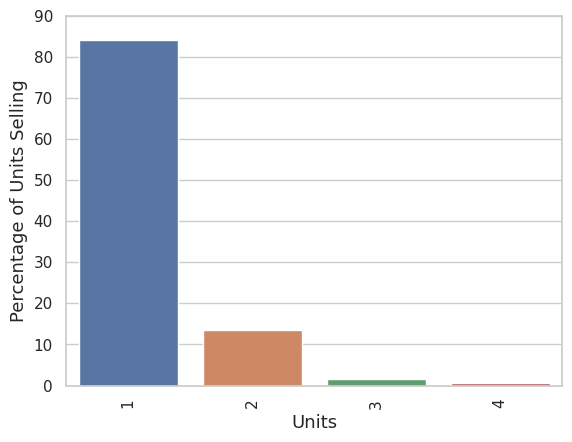

In [15]:
# Assuming 'units' is the column you want to use for x-axis in the bar plot
deptIsle = data_vol_2.groupby(['units']).size().reset_index(name='Total_products')
aisleData = deptIsle.groupby(['units']).sum()['Total_products'].sort_values(ascending=False)

# Calculate the percentage
total_sum = aisleData.sum()
percentage_data = (aisleData / total_sum) * 100

# Use seaborn for creating the bar plot with different colors
sns.set_style('whitegrid')
plt.xticks(rotation='vertical')

# Use the correct arguments for barplot and set different colors for each bar
sns.barplot(x=percentage_data.index[0:4], y=percentage_data.values[0:4])

# Normalize y-axis values to add up to 100 percent
plt.ylim(0, 90)

# Modify y-axis labels to represent a percentage
plt.ylabel('Percentage of Units Selling', fontsize=13)
plt.xlabel('Units', fontsize=13)
plt.show()

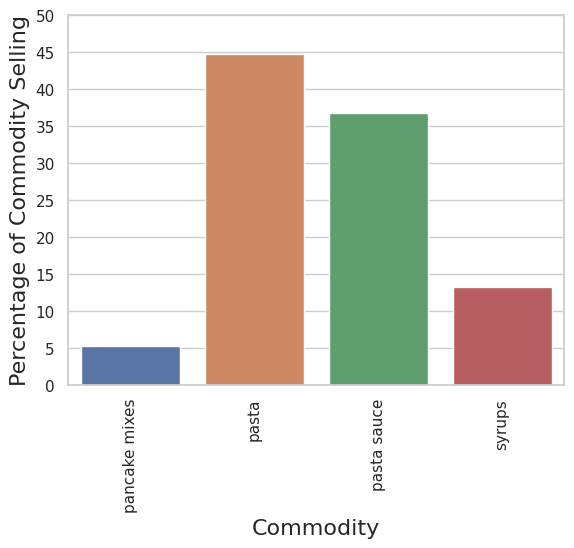

In [16]:
# Assuming 'commodity' is the column you want to use for x-axis in the bar plot
deptIsle = data_vol_2.groupby(['commodity']).size().reset_index(name='Total_products')
aisleData = deptIsle.groupby(['commodity']).sum()['Total_products'].sort_values(ascending=False)

# Calculate the percentage
total_sum = aisleData.sum()
percentage_data = (aisleData / total_sum) * 100

# Use seaborn for creating the bar plot with different colors
sns.set_style('whitegrid')
plt.xticks(rotation='vertical')

# Use the correct arguments for barplot and set different colors for each bar
sns.barplot(x=percentage_data.index[0:4], y=percentage_data.values[0:4])

# Normalize y-axis values to add up to 60 percent
plt.ylim(0, 50)

# Set y-axis ticks with 5% increments
plt.yticks(range(0, 51, 5))

# Modify y-axis labels to represent a percentage
plt.ylabel('Percentage of Commodity Selling', fontsize=16)
plt.xlabel('Commodity', fontsize=16)
plt.show()

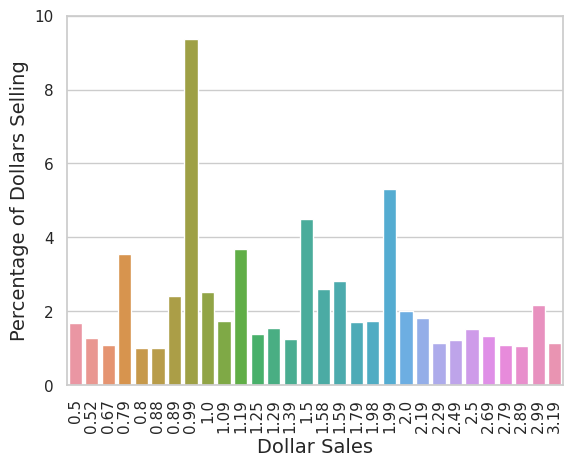

In [17]:
# Assuming 'Dollar Sales' is the column you want to use for x-axis in the bar plot
deptIsle = data_vol_2.groupby(['dollar_sales']).size().reset_index(name='Total_products')
aisleData = deptIsle.groupby(['dollar_sales']).sum()['Total_products'].sort_values(ascending=False)

# Calculate the percentage
total_sum = aisleData.sum()
percentage_data = (aisleData / total_sum) * 100

# Use seaborn for creating the bar plot with different colors
sns.set_style('whitegrid')
plt.xticks(rotation='vertical')

# Use the correct arguments for barplot and set different colors for each bar
sns.barplot(x=percentage_data.index[0:30], y=percentage_data.values[0:30])

# Normalize y-axis values to add up to 10 percent
plt.ylim(0, 10)

# Modify y-axis labels to represent a percentage
plt.ylabel('Percentage of Dollars Selling', fontsize=14)
plt.xlabel('Dollar Sales', fontsize=14)
plt.show()

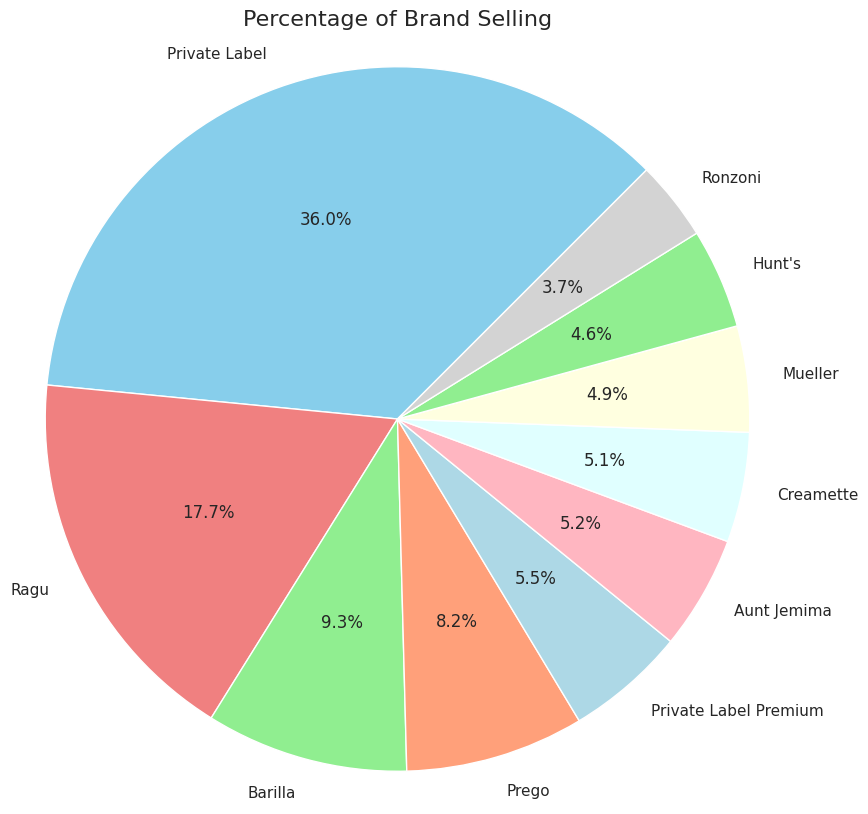

In [18]:
# Assuming 'Brand' is the column you want to use for x-axis in the bar plot
deptIsle = data_vol_2.groupby(['brand']).size().reset_index(name='Total_products')
aisleData = deptIsle.groupby(['brand']).sum()['Total_products'].sort_values(ascending=False)

# Calculate the percentage
total_sum = aisleData.sum()
percentage_data = (aisleData / total_sum) * 100

# Set different colors for each slice
custom_colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightblue', 'lightpink', 'lightcyan', 'lightyellow', 'lightgreen', 'lightgray']

# Set the size of the figure
plt.figure(figsize=(10, 10))

# Create a pie chart with different colors
plt.pie(percentage_data.values[0:10], labels=percentage_data.index[0:10], autopct='%1.1f%%', startangle=45, colors=custom_colors)

# Modify y-axis labels to represent a percentage
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Brand Selling', fontsize=16)
plt.show()

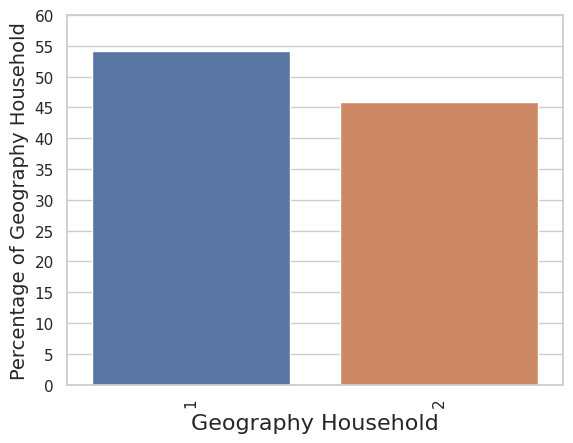

In [19]:
# Assuming 'Geography is the column you want to use for x-axis in the bar plot
deptIsle = data_vol_2.groupby(['geography']).size().reset_index(name='Total_products')
aisleData = deptIsle.groupby(['geography']).sum()['Total_products'].sort_values(ascending=False)

# Calculate the percentage
total_sum = aisleData.sum()
percentage_data = (aisleData / total_sum) * 100

# Use seaborn for creating the bar plot with different colors
sns.set_style('whitegrid')
plt.xticks(rotation='vertical')

# Use the correct arguments for barplot and set different colors for each bar
sns.barplot(x=percentage_data.index[0:2], y=percentage_data.values[0:2])

# Normalize y-axis values to add up to 60 percent
plt.ylim(0, 60)

# Set y-axis ticks with 5% increments
plt.yticks(range(0, 61, 5))

# Modify y-axis labels to represent a percentage
plt.ylabel('Percentage of Geography Household', fontsize=14)
plt.xlabel('Geography Household', fontsize=16)
plt.show()

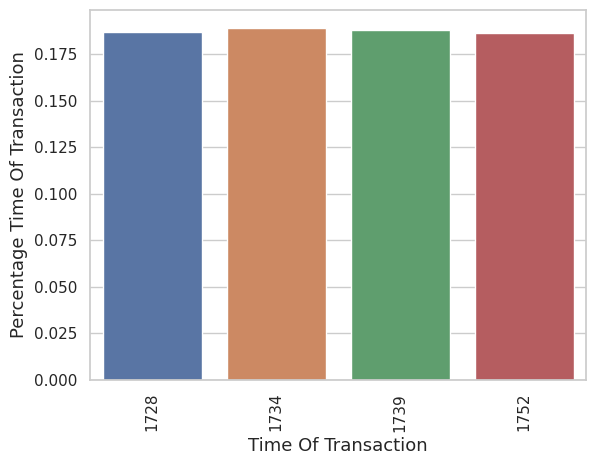

In [20]:
deptIsle = data_vol_2.groupby(['time_of_transaction']).size().reset_index(name='Total_products')
aisleData = deptIsle.groupby(['time_of_transaction']).sum()['Total_products'].sort_values(ascending=False)

# Calculate the percentage
total_sum = aisleData.sum()
percentage_data = (aisleData / total_sum) * 100

# Use seaborn for creating the bar plot
sns.set_style('whitegrid')
plt.xticks(rotation='vertical')

# Use the correct arguments for barplot
sns.barplot(x=percentage_data.index[0:4], y=percentage_data.values[0:4])

plt.ylabel('Percentage Time Of Transaction', fontsize=13)
plt.xlabel('Time Of Transaction', fontsize=13)
plt.show() 

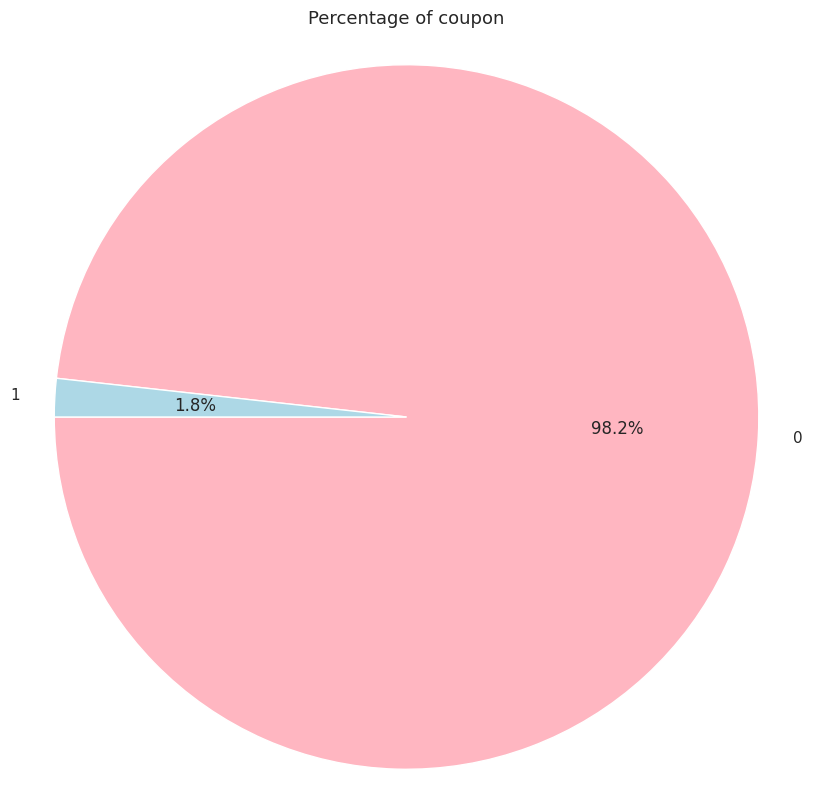

In [21]:
# Assuming 'Coupon' is the column you want to use for x-axis in the bar plot
deptIsle = data_vol_2.groupby(['coupon']).size().reset_index(name='Total_products')
aisleData = deptIsle.groupby(['coupon']).sum()['Total_products'].sort_values(ascending=False)

# Calculate the percentage
total_sum = aisleData.sum()
percentage_data = (aisleData / total_sum) * 100

# Set different colors for each slice
custom_colors = ['lightpink', 'lightblue']

# Set the size of the figure
plt.figure(figsize=(10, 10))

# Create a pie chart
plt.pie(percentage_data.values[0:2], labels=percentage_data.index[0:2], autopct='%1.1f%%', startangle=180,colors=custom_colors)

# Modify y-axis labels to represent a percentage
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of coupon', fontsize=13)
plt.show()

**Time Series Forcasting**

In [22]:
data_vol_2[:]
data_vol_2[:].to_csv('data_vol_2_export.csv', index=False)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.97188D+00    |proj g|=  7.67184D-02

At iterate    5    f=  4.89428D+00    |proj g|=  2.54521D-02


 This problem is unconstrained.



At iterate   10    f=  4.77102D+00    |proj g|=  6.56856D-02

At iterate   15    f=  4.76745D+00    |proj g|=  1.74517D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     20      1     0     0   1.745D-05   4.767D+00
  F =   4.7674543454233334     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


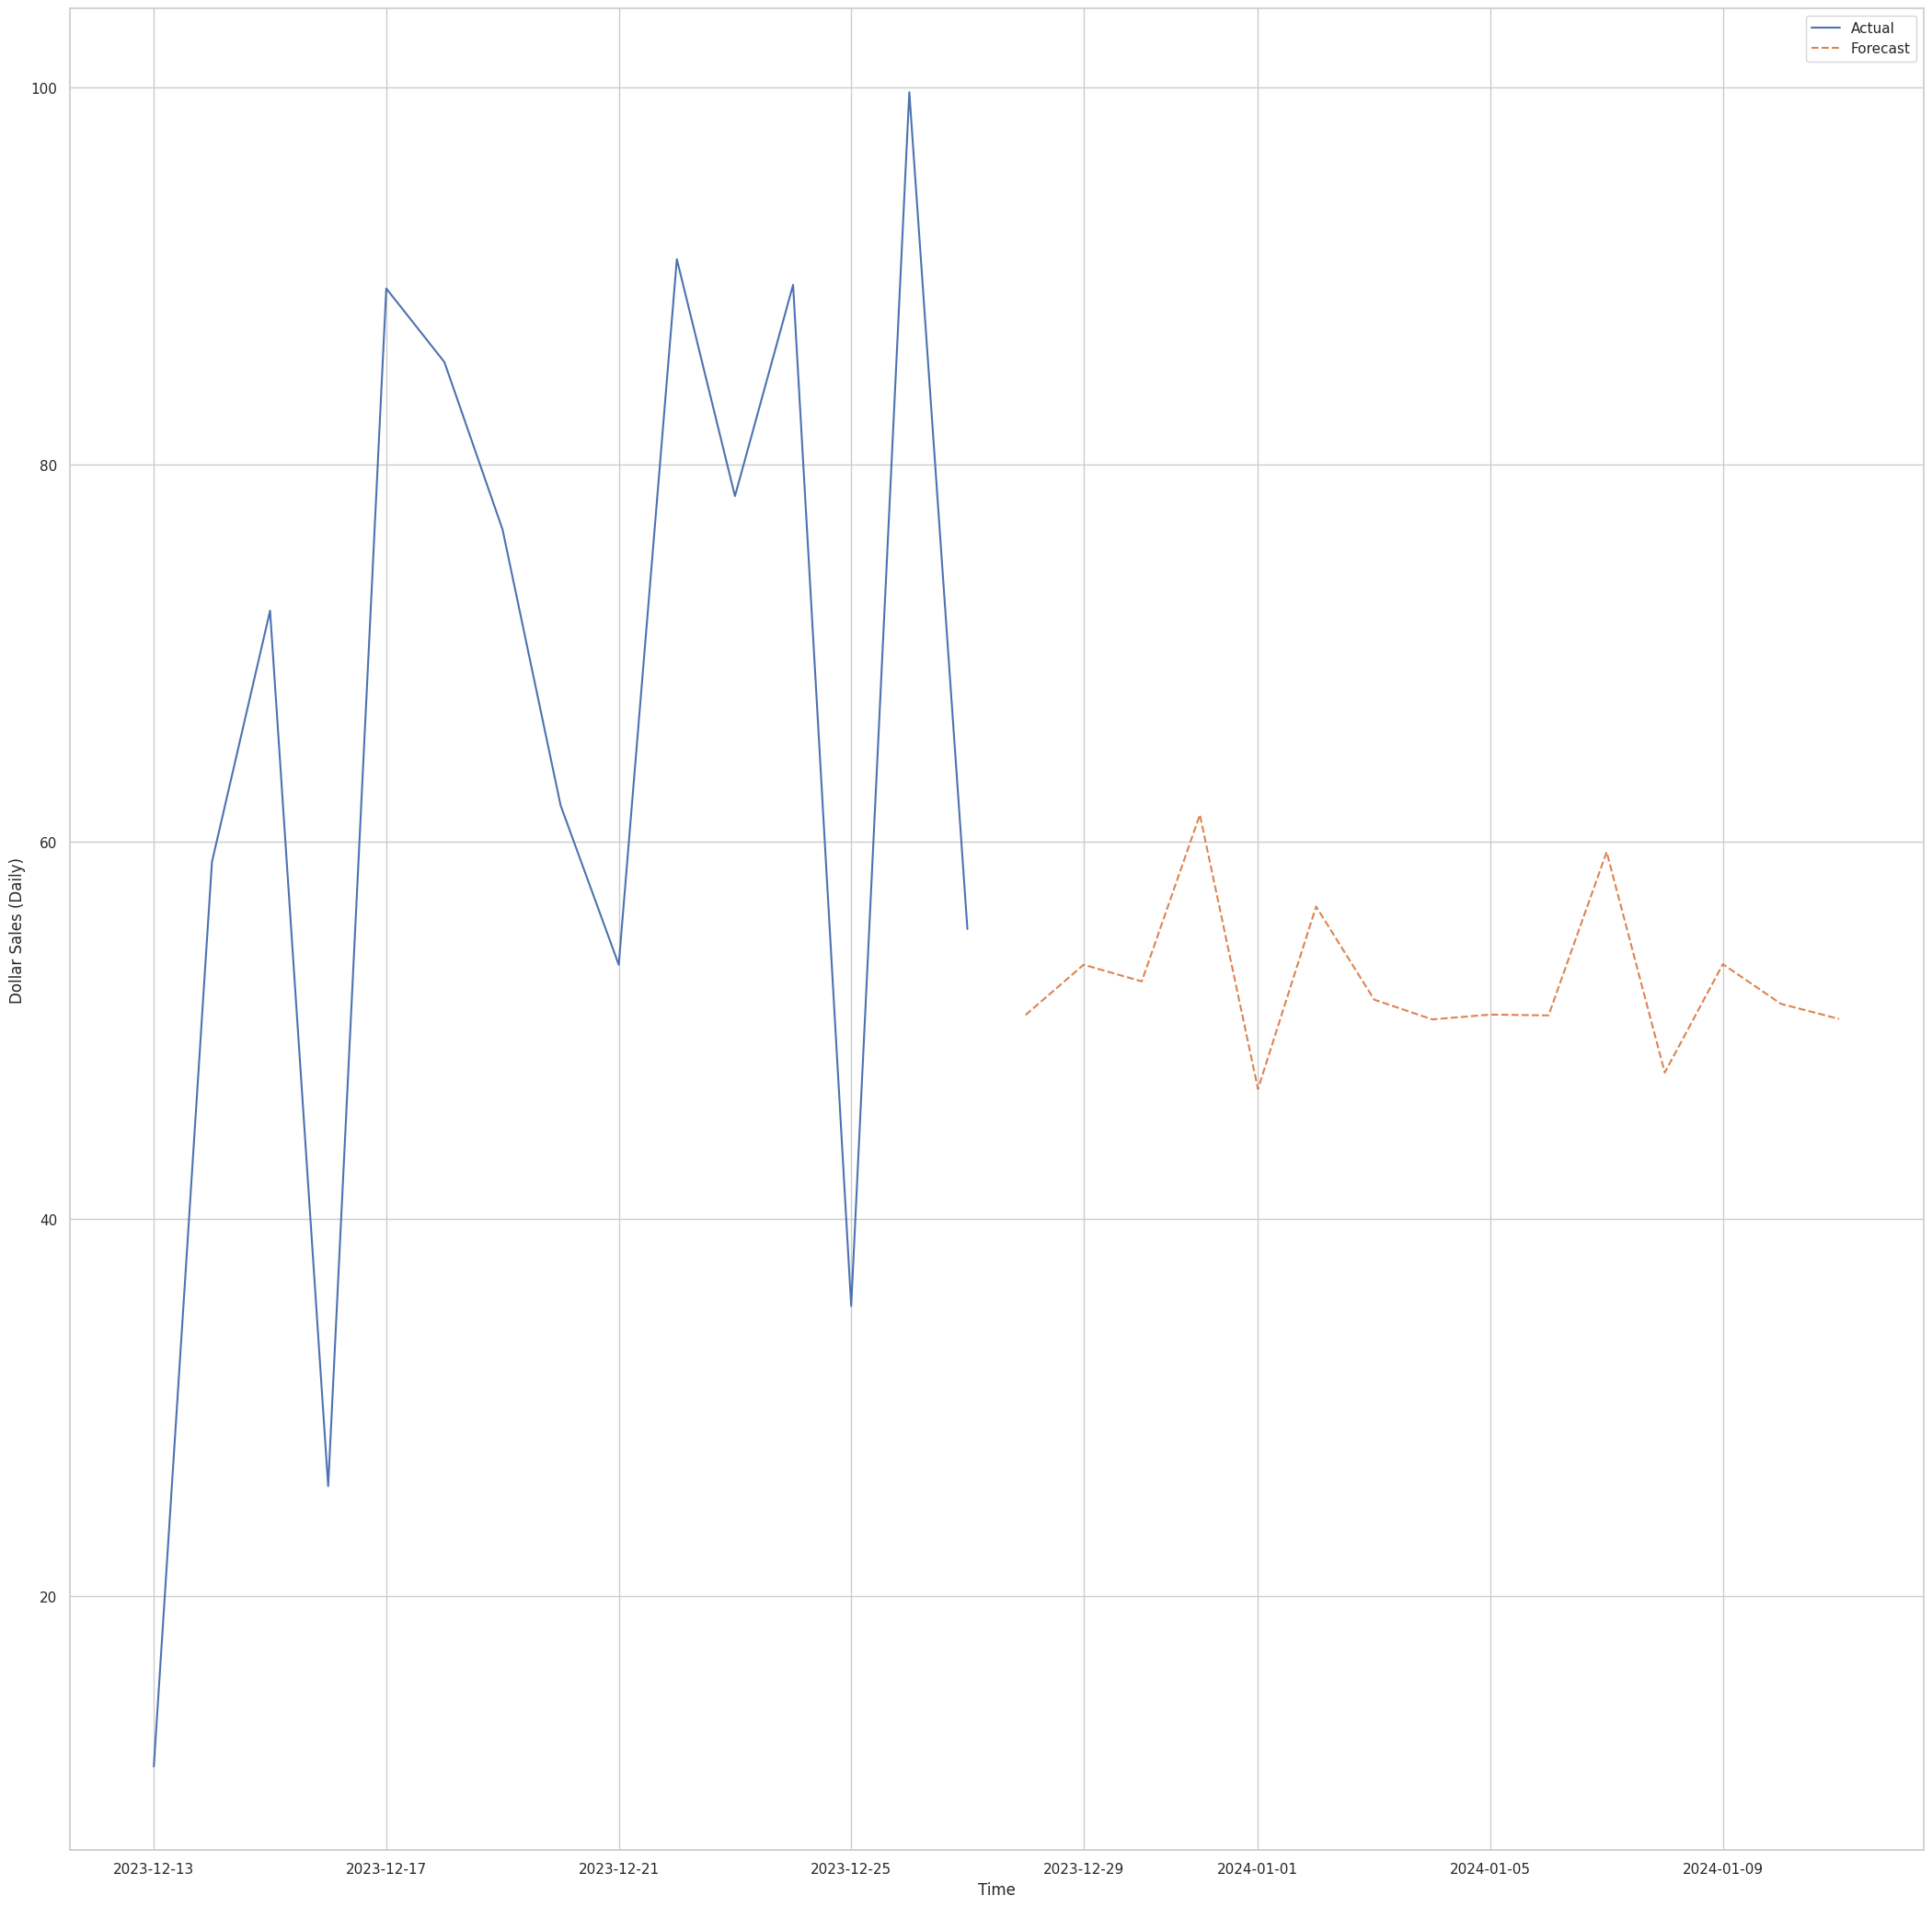

Daily Data:
Mean Absolute Error (MAE): 25.52661947089916
Mean Squared Error (MSE): 871.303097945634
Root Mean Squared Error (RMSE): 29.51784372113983
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.66274D+00    |proj g|=  5.57923D-02

At iterate    5    f=  5.63840D+00    |proj g|=  6.66014D-03

At iterate   10    f=  5.63369D+00    |proj g|=  1.16634D-02

At iterate   15    f=  5.56432D+00    |proj g|=  4.52065D-02

At iterate   20    f=  5.56145D+00    |proj g|=  3.05974D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit

 This problem is unconstrained.


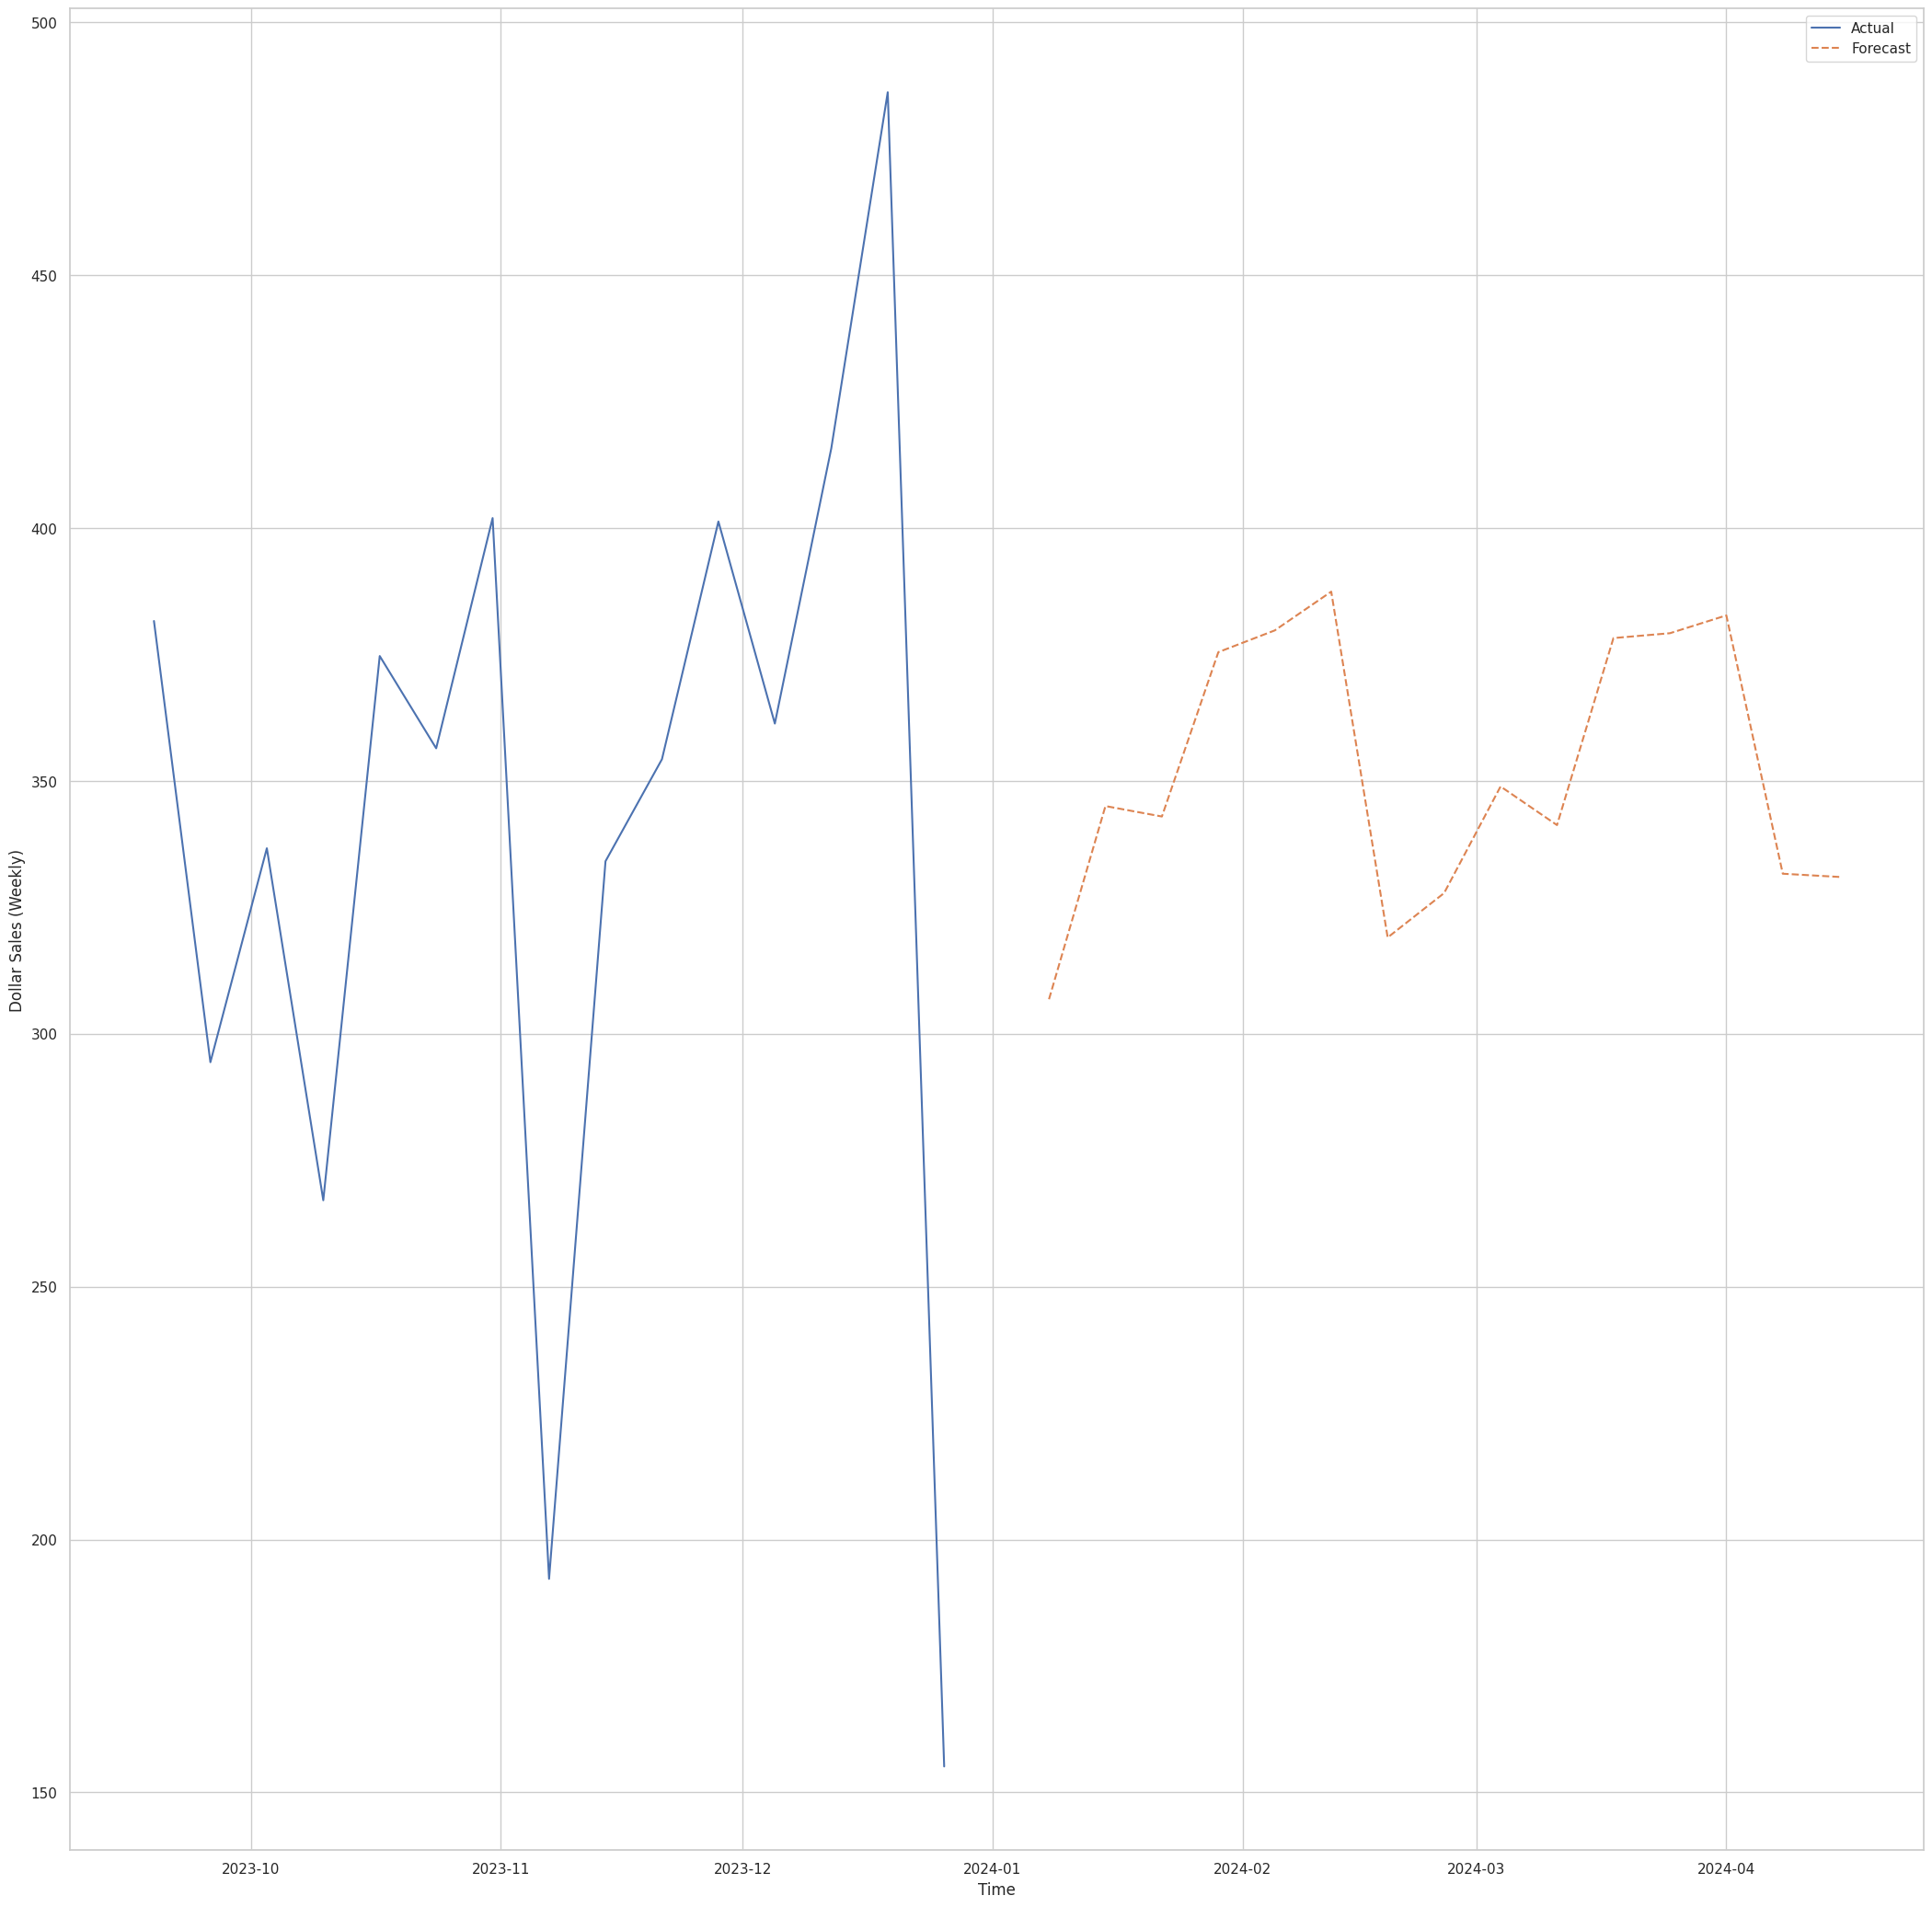

Weekly Data:
Mean Absolute Error (MAE): 61.782853964814684
Mean Squared Error (MSE): 6888.010011251151
Root Mean Squared Error (RMSE): 82.99403599808332


In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Create a sample DataFrame with a range of 1 to 726 days
data_vol_2 = pd.DataFrame({
    'day': pd.date_range(start='2022-01-01', periods=726, freq='D'),
    'dollar_sales': np.random.rand(726) * 100  # Sample dollar sales data
})

# Convert 'day' to datetime
data_vol_2['day'] = pd.to_datetime(data_vol_2['day'])

# Create a time series for daily data
daily_ts = data_vol_2.set_index('day')['dollar_sales']

# Create a time series for weekly data
weekly_ts = data_vol_2.groupby(data_vol_2['day'].dt.to_period('W-Mon'))['dollar_sales'].sum()

# Separate daily and weekly time series
daily_combined_ts = daily_ts.resample('D').sum()  # Resample to daily frequency
weekly_combined_ts = weekly_ts.resample('W-Mon').sum()  # Resample to weekly frequency

# Seasonal decomposition to identify seasonality for daily data
decomposition_daily = seasonal_decompose(daily_combined_ts, period=7, extrapolate_trend='freq')
trend_daily = decomposition_daily.trend.dropna()

# Fit SARIMA model for daily data
p, d, q = 1, 1, 1  # Example values for non-seasonal order
P, D, Q, s = 1, 1, 1, 7  # Example values for seasonal order
sarima_model_daily = SARIMAX(daily_combined_ts, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result_daily = sarima_model_daily.fit()

# Forecast for daily data
n = 15  # Specify the number of steps ahead
forecast_daily = sarima_result_daily.get_forecast(steps=n)

# Plot actual vs. predicted values for daily data
plt.figure(figsize=(26, 26))  # Set the figure size
plt.plot(daily_combined_ts.index[-n:], daily_combined_ts[-n:], label='Actual')
plt.plot(forecast_daily.predicted_mean.index, forecast_daily.predicted_mean, label='Forecast', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Dollar Sales (Daily)')
plt.legend()
plt.show()

# Evaluate SARIMA Model for daily data
mae_daily = mean_absolute_error(daily_combined_ts[-n:], forecast_daily.predicted_mean)
mse_daily = mean_squared_error(daily_combined_ts[-n:], forecast_daily.predicted_mean)
rmse_daily = np.sqrt(mse_daily)

print('Daily Data:')
print('Mean Absolute Error (MAE):', mae_daily)
print('Mean Squared Error (MSE):', mse_daily)
print('Root Mean Squared Error (RMSE):', rmse_daily)

# Seasonal decomposition to identify seasonality for weekly data
decomposition_weekly = seasonal_decompose(weekly_combined_ts, period=7, extrapolate_trend='freq')
trend_weekly = decomposition_weekly.trend.dropna()

# Fit SARIMA model for weekly data
sarima_model_weekly = SARIMAX(weekly_combined_ts, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result_weekly = sarima_model_weekly.fit()

# Forecast for weekly data
forecast_weekly = sarima_result_weekly.get_forecast(steps=n)

# Plot actual vs. predicted values for weekly data
plt.figure(figsize=(26, 26))  # Set the figure size
plt.plot(weekly_combined_ts.index[-n:].to_timestamp(), weekly_combined_ts[-n:], label='Actual')
plt.plot(forecast_weekly.predicted_mean.index, forecast_weekly.predicted_mean, label='Forecast', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Dollar Sales (Weekly)')
plt.legend()
plt.show()

# Evaluate SARIMA Model for weekly data
mae_weekly = mean_absolute_error(weekly_combined_ts[-n:], forecast_weekly.predicted_mean)
mse_weekly = mean_squared_error(weekly_combined_ts[-n:], forecast_weekly.predicted_mean)
rmse_weekly = np.sqrt(mse_weekly)

print('Weekly Data:')
print('Mean Absolute Error (MAE):', mae_weekly)
print('Mean Squared Error (MSE):', mse_weekly)
print('Root Mean Squared Error (RMSE):', rmse_weekly)

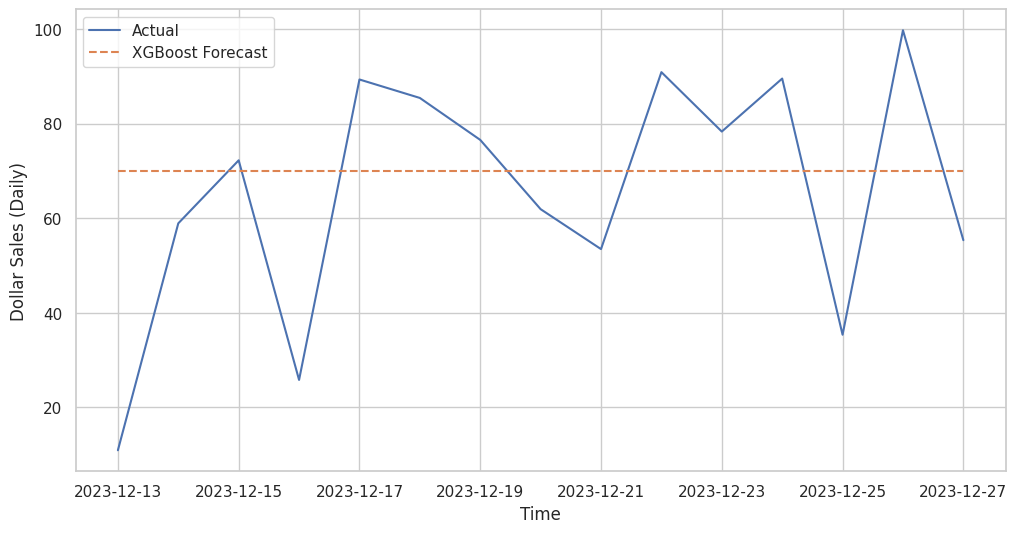

XGBoost - Daily Data:
Mean Absolute Error (MAE): 20.691005569106245
Mean Squared Error (MSE): 649.2498376699879
Root Mean Squared Error (RMSE): 25.4803814270899


In [24]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare data for XGBoost
X_daily = np.arange(len(daily_combined_ts)).reshape(-1, 1)
y_daily = daily_combined_ts.values

# Create XGBoost model
xgb_model_daily = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model_daily.fit(X_daily, y_daily)

# Forecast for daily data using XGBoost
forecast_xgb_daily = xgb_model_daily.predict(np.arange(len(daily_combined_ts), len(daily_combined_ts) + n).reshape(-1, 1))

# Plot actual vs. predicted values for daily data using XGBoost
plt.figure(figsize=(12, 6))
plt.plot(daily_combined_ts.index[-n:], daily_combined_ts[-n:], label='Actual')
plt.plot(daily_combined_ts.index[-n:], forecast_xgb_daily, label='XGBoost Forecast', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Dollar Sales (Daily)')
plt.legend()
plt.show()

# Evaluate XGBoost Model for daily data
mae_xgb_daily = mean_absolute_error(daily_combined_ts[-n:], forecast_xgb_daily)
mse_xgb_daily = mean_squared_error(daily_combined_ts[-n:], forecast_xgb_daily)
rmse_xgb_daily = np.sqrt(mse_xgb_daily)

print('XGBoost - Daily Data:')
print('Mean Absolute Error (MAE):', mae_xgb_daily)
print('Mean Squared Error (MSE):', mse_xgb_daily)
print('Root Mean Squared Error (RMSE):', rmse_xgb_daily)


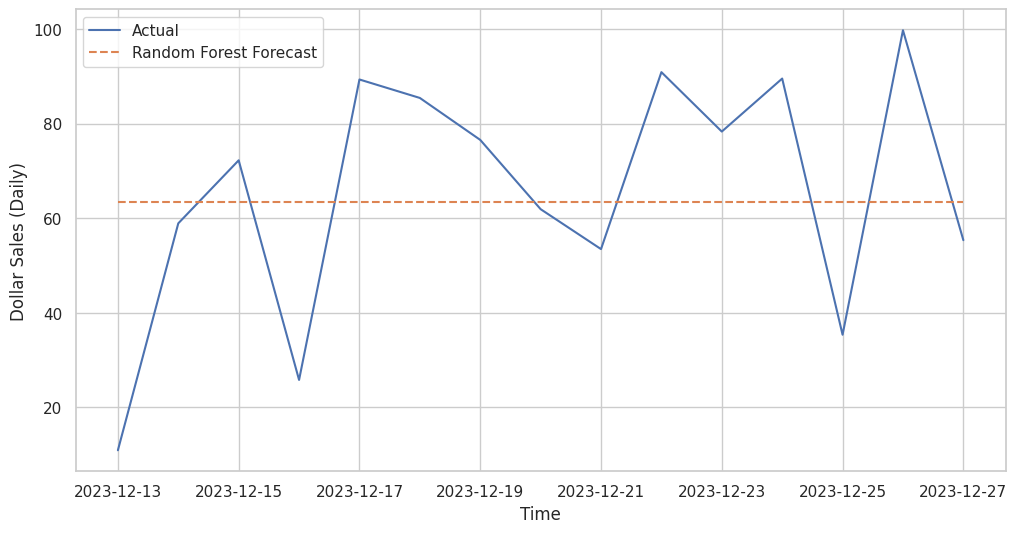

Random Forest - Daily Data:
Mean Absolute Error (MAE): 21.12872417427069
Mean Squared Error (MSE): 635.4193429704999
Root Mean Squared Error (RMSE): 25.207525522559724


In [25]:
from sklearn.ensemble import RandomForestRegressor

# Create Random Forest model
rf_model_daily = RandomForestRegressor()
rf_model_daily.fit(X_daily, y_daily)

# Forecast for daily data using Random Forest
forecast_rf_daily = rf_model_daily.predict(np.arange(len(daily_combined_ts), len(daily_combined_ts) + n).reshape(-1, 1))

# Plot actual vs. predicted values for daily data using Random Forest
plt.figure(figsize=(12, 6))
plt.plot(daily_combined_ts.index[-n:], daily_combined_ts[-n:], label='Actual')
plt.plot(daily_combined_ts.index[-n:], forecast_rf_daily, label='Random Forest Forecast', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Dollar Sales (Daily)')
plt.legend()
plt.show()

# Evaluate Random Forest Model for daily data
mae_rf_daily = mean_absolute_error(daily_combined_ts[-n:], forecast_rf_daily)
mse_rf_daily = mean_squared_error(daily_combined_ts[-n:], forecast_rf_daily)
rmse_rf_daily = np.sqrt(mse_rf_daily)

print('Random Forest - Daily Data:')
print('Mean Absolute Error (MAE):', mae_rf_daily)
print('Mean Squared Error (MSE):', mse_rf_daily)
print('Root Mean Squared Error (RMSE):', rmse_rf_daily)


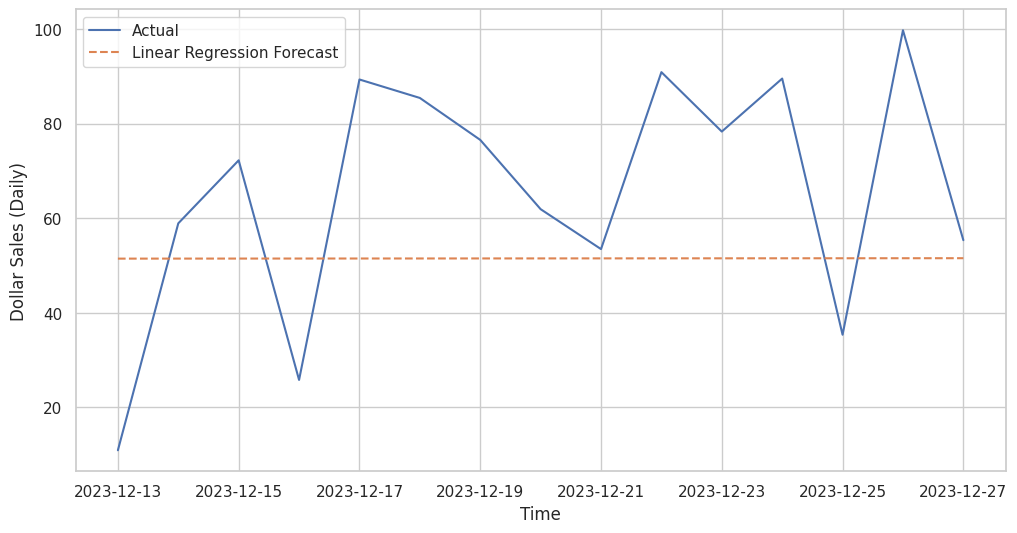

Linear Regression - Daily Data:
Mean Absolute Error (MAE): 25.067888345986265
Mean Squared Error (MSE): 828.397986391402
Root Mean Squared Error (RMSE): 28.7819038006766


In [26]:
from sklearn.linear_model import LinearRegression

# Create Linear Regression model
lr_model_daily = LinearRegression()
lr_model_daily.fit(X_daily, y_daily)

# Forecast for daily data using Linear Regression
forecast_lr_daily = lr_model_daily.predict(np.arange(len(daily_combined_ts), len(daily_combined_ts) + n).reshape(-1, 1))

# Plot actual vs. predicted values for daily data using Linear Regression
plt.figure(figsize=(12, 6))
plt.plot(daily_combined_ts.index[-n:], daily_combined_ts[-n:], label='Actual')
plt.plot(daily_combined_ts.index[-n:], forecast_lr_daily, label='Linear Regression Forecast', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Dollar Sales (Daily)')
plt.legend()
plt.show()

# Evaluate Linear Regression Model for daily data
mae_lr_daily = mean_absolute_error(daily_combined_ts[-n:], forecast_lr_daily)
mse_lr_daily = mean_squared_error(daily_combined_ts[-n:], forecast_lr_daily)
rmse_lr_daily = np.sqrt(mse_lr_daily)

print('Linear Regression - Daily Data:')
print('Mean Absolute Error (MAE):', mae_lr_daily)
print('Mean Squared Error (MSE):', mse_lr_daily)
print('Root Mean Squared Error (RMSE):', rmse_lr_daily)


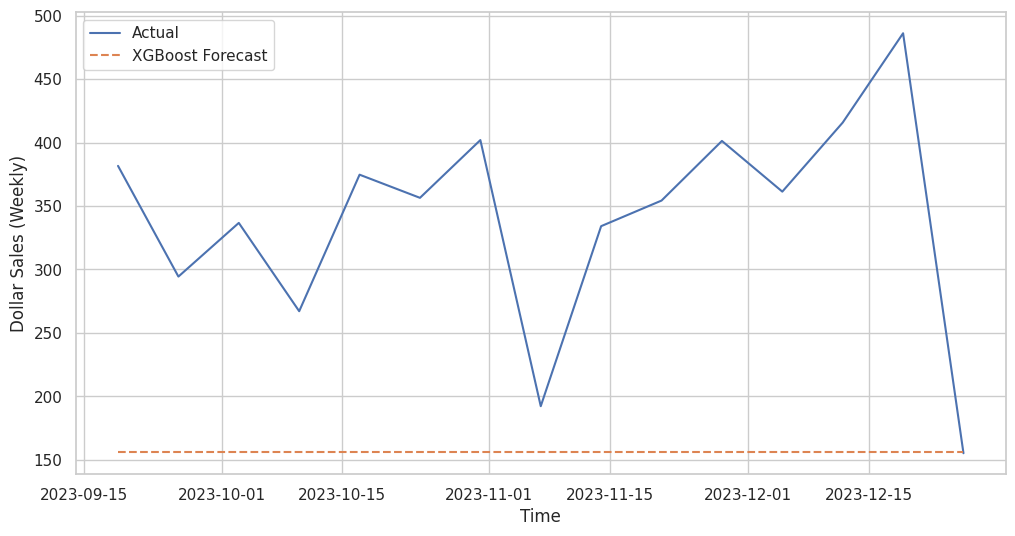

XGBoost - Weekly Data:
Mean Absolute Error (MAE): 184.6738003258423
Mean Squared Error (MSE): 40844.064180729176
Root Mean Squared Error (RMSE): 202.0991444334418


In [27]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare data for XGBoost
X_weekly = np.arange(len(weekly_combined_ts)).reshape(-1, 1)
y_weekly = weekly_combined_ts.values

# Create XGBoost model
xgb_model_weekly = xgb.XGBRegressor(objective='reg:squarederror')
xgb_model_weekly.fit(X_weekly, y_weekly)

# Forecast for weekly data using XGBoost
forecast_xgb_weekly = xgb_model_weekly.predict(np.arange(len(weekly_combined_ts), len(weekly_combined_ts) + n).reshape(-1, 1))

# Plot actual vs. predicted values for weekly data using XGBoost
plt.figure(figsize=(12, 6))
plt.plot(weekly_combined_ts.index[-n:].to_timestamp(), weekly_combined_ts[-n:], label='Actual')
plt.plot(weekly_combined_ts.index[-n:].to_timestamp(), forecast_xgb_weekly, label='XGBoost Forecast', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Dollar Sales (Weekly)')
plt.legend()
plt.show()

# Evaluate XGBoost Model for weekly data
mae_xgb_weekly = mean_absolute_error(weekly_combined_ts[-n:], forecast_xgb_weekly)
mse_xgb_weekly = mean_squared_error(weekly_combined_ts[-n:], forecast_xgb_weekly)
rmse_xgb_weekly = np.sqrt(mse_xgb_weekly)

print('XGBoost - Weekly Data:')
print('Mean Absolute Error (MAE):', mae_xgb_weekly)
print('Mean Squared Error (MSE):', mse_xgb_weekly)
print('Root Mean Squared Error (RMSE):', rmse_xgb_weekly)


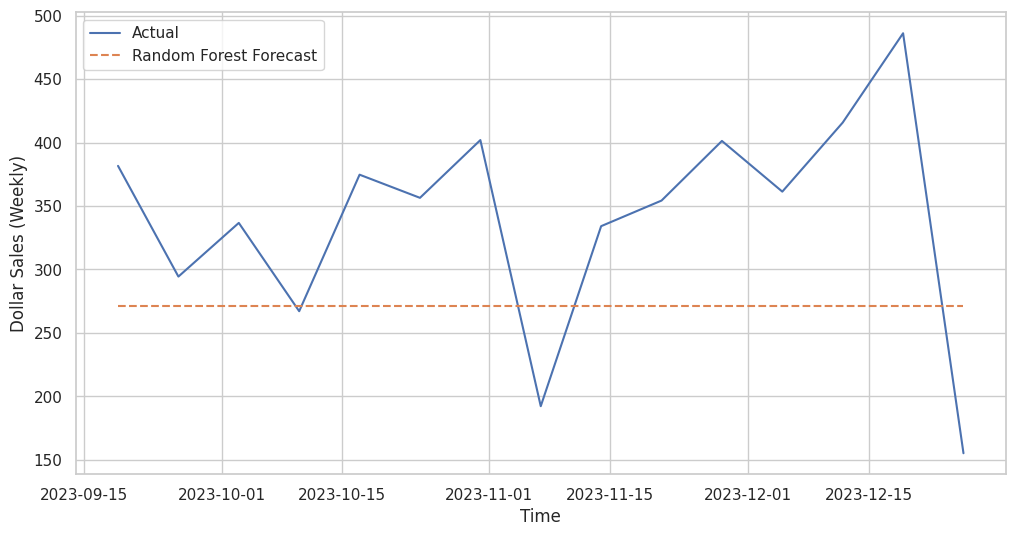

Random Forest - Weekly Data:
Mean Absolute Error (MAE): 96.36188244213055
Mean Squared Error (MSE): 11685.648705413743
Root Mean Squared Error (RMSE): 108.10017902581727


In [28]:
from sklearn.ensemble import RandomForestRegressor

# Create Random Forest model
rf_model_weekly = RandomForestRegressor()
rf_model_weekly.fit(X_weekly, y_weekly)

# Forecast for weekly data using Random Forest
forecast_rf_weekly = rf_model_weekly.predict(np.arange(len(weekly_combined_ts), len(weekly_combined_ts) + n).reshape(-1, 1))

# Plot actual vs. predicted values for weekly data using Random Forest
plt.figure(figsize=(12, 6))
plt.plot(weekly_combined_ts.index[-n:].to_timestamp(), weekly_combined_ts[-n:], label='Actual')
plt.plot(weekly_combined_ts.index[-n:].to_timestamp(), forecast_rf_weekly, label='Random Forest Forecast', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Dollar Sales (Weekly)')
plt.legend()
plt.show()

# Evaluate Random Forest Model for weekly data
mae_rf_weekly = mean_absolute_error(weekly_combined_ts[-n:], forecast_rf_weekly)
mse_rf_weekly = mean_squared_error(weekly_combined_ts[-n:], forecast_rf_weekly)
rmse_rf_weekly = np.sqrt(mse_rf_weekly)

print('Random Forest - Weekly Data:')
print('Mean Absolute Error (MAE):', mae_rf_weekly)
print('Mean Squared Error (MSE):', mse_rf_weekly)
print('Root Mean Squared Error (RMSE):', rmse_rf_weekly)


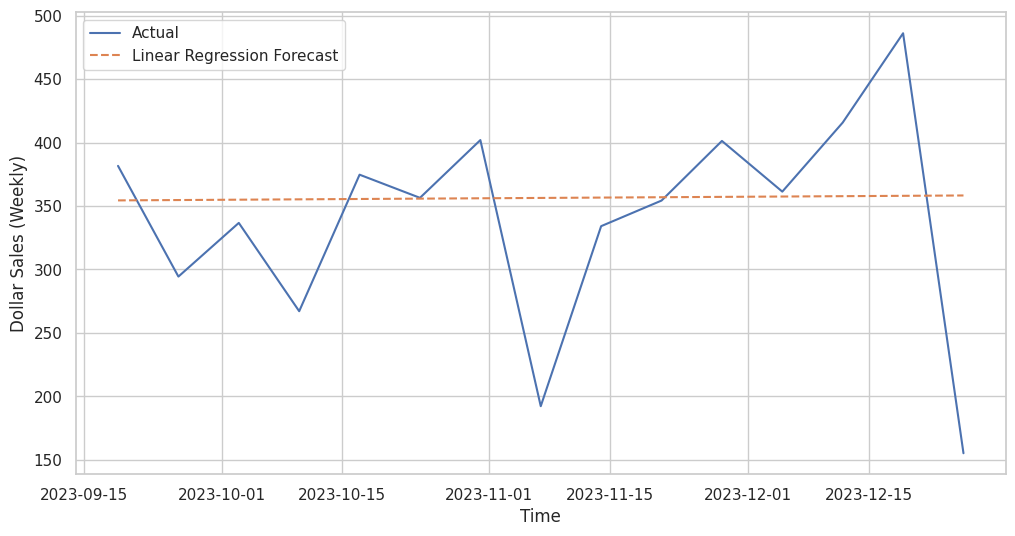

Linear Regression - Weekly Data:
Mean Absolute Error (MAE): 59.07858226887655
Mean Squared Error (MSE): 7028.521611532892
Root Mean Squared Error (RMSE): 83.83627861214316


In [29]:
from sklearn.linear_model import LinearRegression

# Create Linear Regression model
lr_model_weekly = LinearRegression()
lr_model_weekly.fit(X_weekly, y_weekly)

# Forecast for weekly data using Linear Regression
forecast_lr_weekly = lr_model_weekly.predict(np.arange(len(weekly_combined_ts), len(weekly_combined_ts) + n).reshape(-1, 1))

# Plot actual vs. predicted values for weekly data using Linear Regression
plt.figure(figsize=(12, 6))
plt.plot(weekly_combined_ts.index[-n:].to_timestamp(), weekly_combined_ts[-n:], label='Actual')
plt.plot(weekly_combined_ts.index[-n:].to_timestamp(), forecast_lr_weekly, label='Linear Regression Forecast', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Dollar Sales (Weekly)')
plt.legend()
plt.show()

# Evaluate Linear Regression Model for weekly data
mae_lr_weekly = mean_absolute_error(weekly_combined_ts[-n:], forecast_lr_weekly)
mse_lr_weekly = mean_squared_error(weekly_combined_ts[-n:], forecast_lr_weekly)
rmse_lr_weekly = np.sqrt(mse_lr_weekly)

print('Linear Regression - Weekly Data:')
print('Mean Absolute Error (MAE):', mae_lr_weekly)
print('Mean Squared Error (MSE):', mse_lr_weekly)
print('Root Mean Squared Error (RMSE):', rmse_lr_weekly)
